In [ ]:
import os
import pandas as pd

# 시기별 지역별 인기순위 추출
for i in range(8):        
    area = globals()[f"df_{i}"][(globals()[f"df_{i}"]['ANALS_TY_CD'] == 3) &(globals()[f"df_{i}"]['ANALS_PD_CD'] == 'p3')].sort_values(by='RANK_CO', ascending=True)['AREA_NM'].unique()

    for j in area:
        final = globals()[f"df_{i}"][(globals()[f"df_{i}"]['ANALS_TY_CD'] == 3) &(globals()[f"df_{i}"]['ANALS_PD_CD'] == 'p3') & (globals()[f"df_{i}"]['AREA_NM']==j)].sort_values(by='RANK_CO', ascending=True)


        # 선택한 열만 남김
        final = final[['SEQ_NO', 'RANK_CO', 'ISBN_THIRTEEN_NO', 'BOOK_TITLE_NM',
                       'AUTHR_NM', 'BOOK_INTRCN_CN','PUBLISHER_NM', 'PBLICTE_DE',
                       'KDC_NM', 'LON_CO','ANALS_LON_TOT_CO']]
        
        # 저장할 디렉토리 경로
        directory = f'{i}th/area_p3'
        
        # 디렉토리가 없으면 생성
        if not os.path.exists(directory):
            os.makedirs(directory)
        
        # CSV 파일로 저장
        final.to_csv(f'{directory}/{j}.csv', index=False)



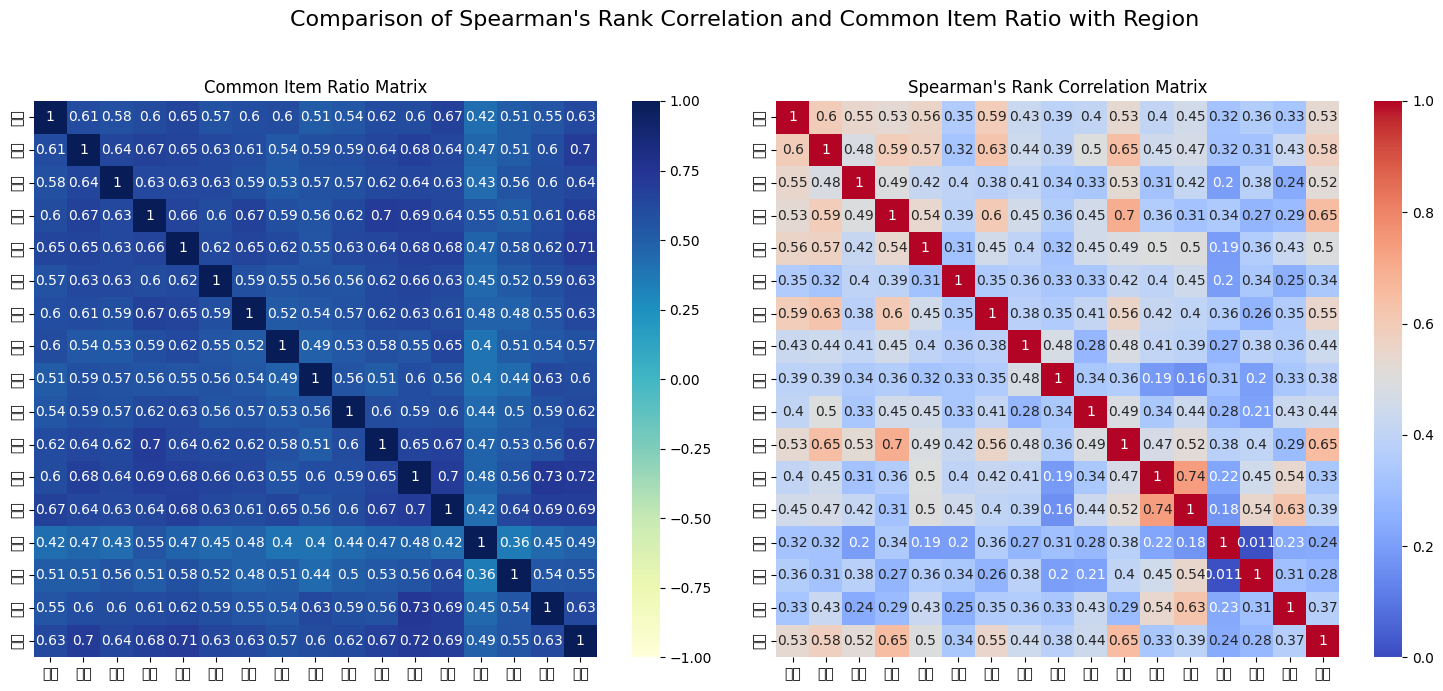

In [1]:

import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore", category=UserWarning, message=".*Glyph.*")

area= ['경남' , '전남' , '경북' , '강원' , 
    '광주' , '충남' , '전북' , '대전', 
    '제주' , '울산' , '충북' , '인천' , 
    '경기' , '세종' , '대구' , '서울' , '부산' ]


correlation_matrix = pd.DataFrame(0, index=area, columns=area, dtype=float)
common_ratio_matrix = pd.DataFrame(0, index=area, columns=area, dtype=float)

# 각 나이대별 순위 상관계수 계산


for num in range(5):
    rank_data = []
    for i in area:
        rank_list1 = pd.read_csv(f'{num+3}th/area_p3/{i}.csv')
        rank_list1 = rank_list1['ISBN_THIRTEEN_NO'][:100]
        rank_data.append(rank_list1)


    for i, age1 in enumerate(area):
        for j, age2 in enumerate(area):
            # 두 나이대 순위 데이터의 공통된 ISBN_THIRTEEN_NO 찾기
            rank1 = rank_data[i]
            rank2 = rank_data[j]
        # 순위 리스트를 순위 딕셔너리로 변환 (책 이름 -> 순위)
            rank1_dict = {book: i+1 for i, book in enumerate(rank1)}
            rank2_dict = {book: i+1 for i, book in enumerate(rank2)}

            # 공통된 책들 찾기
            common_books = list(set(rank1_dict.keys()).intersection(set(rank2_dict.keys())))
            common_count = len(common_books)
            total_count = max(len(rank1_dict), len(rank2_dict))  # 전체 책 수는 두 리스트 중 더 큰 값


            # 공통된 책들의 순위를 리스트로 만듭니다
            rank1_common = [rank1_dict[book] for book in common_books]
            rank2_common = [rank2_dict[book] for book in common_books]

            # 공통된 책들에 대해서 순위 상관계수 (스피어만) 계산
            if len(rank1_common) > 1:  # 공통된 책이 두 개 이상일 때만 상관계수를 계산
                spearman_corr, _ = stats.spearmanr(rank1_common, rank2_common)
                common_ratio = common_count / total_count
                    
                # 상관계수와 공통 비율 행렬에 값 저장
                correlation_matrix.loc[age1, age2] += spearman_corr
                common_ratio_matrix.loc[age1, age2] += common_ratio
            else:
                # 공통된 책이 부족하면 None 또는 NaN으로 표시
                correlation_matrix.loc[age1, age2] +=0
                common_ratio_matrix.loc[age1, age2] +=0
                
correlation_matrix = correlation_matrix/ 5 
common_ratio_matrix = common_ratio_matrix/5
               
# 상관계수 행렬을 히트맵으로 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# 첫 번째 히트맵 (상관계수 행렬)
sns.heatmap(common_ratio_matrix, annot=True, cmap="YlGnBu", vmin=-1, vmax=1, center=0, ax=axes[0])
axes[0].set_title("Common Item Ratio Matrix")

# 두 번째 히트맵 (공통 항목 비율 행렬)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1, ax=axes[1])
axes[1].set_title("Spearman's Rank Correlation Matrix")

# 전체 제목 설정
plt.suptitle("Comparison of Spearman's Rank Correlation and Common Item Ratio with Region", fontsize=16)

# 레이아웃 조정
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # 상단 여백 조정

# 그래프 출력
plt.show()

In [2]:
import pandas as pd
loan = pd.read_csv('data/loan_information/loan_information.csv', low_memory=False,  dtype={'ISBN_THIRTEEN_NO': str})

In [3]:
grouped = loan.groupby('INPT_DE')

# 각 그룹을 동적으로 변수에 저장
for i, (category, group_df) in enumerate(grouped):
    if i >=3:
    # globals()를 사용하여 동적으로 변수명 생성
        globals()[f"df_{i}"] = group_df

In [4]:
age = ['영유아(0~5)',  '유아(6~7)', '초등(8~13)', '청소년(14~19)','20대', '30대' ,'40대', '50대', '60대 이상']
gender = ['남성', '여성']

In [5]:
import os
import pandas as pd

# 경로가 없으면 디렉토리 생성
for i in range(5):
    for j in gender:
        for k in age:
            # 조건을 만족하는 DataFrame을 선택
            final = globals()[f"df_{i+3}"][
                (globals()[f"df_{i+3}"]['ANALS_TY_CD'] == 4) &
                (globals()[f"df_{i+3}"]['ANALS_PD_CD'] == 'p2') &
                (globals()[f"df_{i+3}"]['SEXDSTN_FLAG_NM'] == j) &
                (globals()[f"df_{i+3}"]['AGE_FLAG_NM'] == k)].sort_values(by='RANK_CO', ascending=True)
            
            
            # 선택한 열만 남김
            final = final[['SEQ_NO', 'RANK_CO', 'ISBN_THIRTEEN_NO', 'BOOK_TITLE_NM',
                        'AUTHR_NM', 'BOOK_INTRCN_CN','PUBLISHER_NM', 'PBLICTE_DE',
                        'KDC_NM', 'LON_CO','ANALS_LON_TOT_CO']]
            
        # 저장할 디렉토리 경로
            directory = f'AGE_GENDER/{i+3}th/'
            
            # 디렉토리가 없으면 생성
            if not os.path.exists(directory):
                os.makedirs(directory)
            
            # CSV 파일로 저장
            final.to_csv(f'{directory}/{j}_{k}.csv', index=False)


In [6]:
import scipy.stats as stats

for i in age:
    spearman_corr = 0
    common_ratio = 0
    for num in range(5):
        rank_list1 = pd.read_csv(f'AGE_GENDER/{num+3}th/남성_{i}.csv')
        rank_list1 = rank_list1['ISBN_THIRTEEN_NO'][:100]

        rank_list2 = pd.read_csv(f'AGE_GENDER/{num+3}th/여성_{i}.csv')
        rank_list2 = rank_list2['ISBN_THIRTEEN_NO'][:100]
        

        # 순위 리스트를 순위 딕셔너리로 변환 (책 이름 -> 순위)
        rank1_dict = {book: i+1 for i, book in enumerate(rank_list1)}
        rank2_dict = {book: i+1 for i, book in enumerate(rank_list2)}

        # 공통된 책들 찾기
        common_books = list(set(rank1_dict.keys()).intersection(set(rank2_dict.keys())))
        common_count = len(common_books)
        total_count = max(len(rank_list1), len(rank_list2))  # 전체 책 수는 두 리스트 중 더 큰 값


        # 공통된 책들의 순위를 리스트로 만듭니다
        rank1_common = [rank1_dict[book] for book in common_books]
        rank2_common = [rank2_dict[book] for book in common_books]

        # 공통된 책들에 대해서 순위 상관계수 (스피어만) 계산
        if len(rank1_common) > 1:  # 공통된 책이 두 개 이상일 때만 상관계수를 계산
            spearman_corr += stats.spearmanr(rank1_common, rank2_common)[0]
            common_ratio += common_count / total_count
        

    spearman_corr = spearman_corr / 5
    common_ratio = common_ratio / 5        
                
            
    print(f"남녀간 {i}의 공통된 항목의 비율\n: {common_ratio:.2f}\n")
    print(f"남녀간 {i}의 상관계수\n: {spearman_corr}\n")
                

남녀간 영유아(0~5)의 공통된 항목의 비율
: 0.48

남녀간 영유아(0~5)의 상관계수
: 0.4970152240335072

남녀간 유아(6~7)의 공통된 항목의 비율
: 0.54

남녀간 유아(6~7)의 상관계수
: 0.6540560711179239

남녀간 초등(8~13)의 공통된 항목의 비율
: 0.58

남녀간 초등(8~13)의 상관계수
: 0.23116017398084324

남녀간 청소년(14~19)의 공통된 항목의 비율
: 0.47

남녀간 청소년(14~19)의 상관계수
: 0.4345213686247183

남녀간 20대의 공통된 항목의 비율
: 0.36

남녀간 20대의 상관계수
: 0.07242357308594018

남녀간 30대의 공통된 항목의 비율
: 0.38

남녀간 30대의 상관계수
: 0.17658739995738398

남녀간 40대의 공통된 항목의 비율
: 0.55

남녀간 40대의 상관계수
: 0.2180998562783388

남녀간 50대의 공통된 항목의 비율
: 0.44

남녀간 50대의 상관계수
: 0.04169919414057292

남녀간 60대 이상의 공통된 항목의 비율
: 0.33

남녀간 60대 이상의 상관계수
: 0.31638521423188426



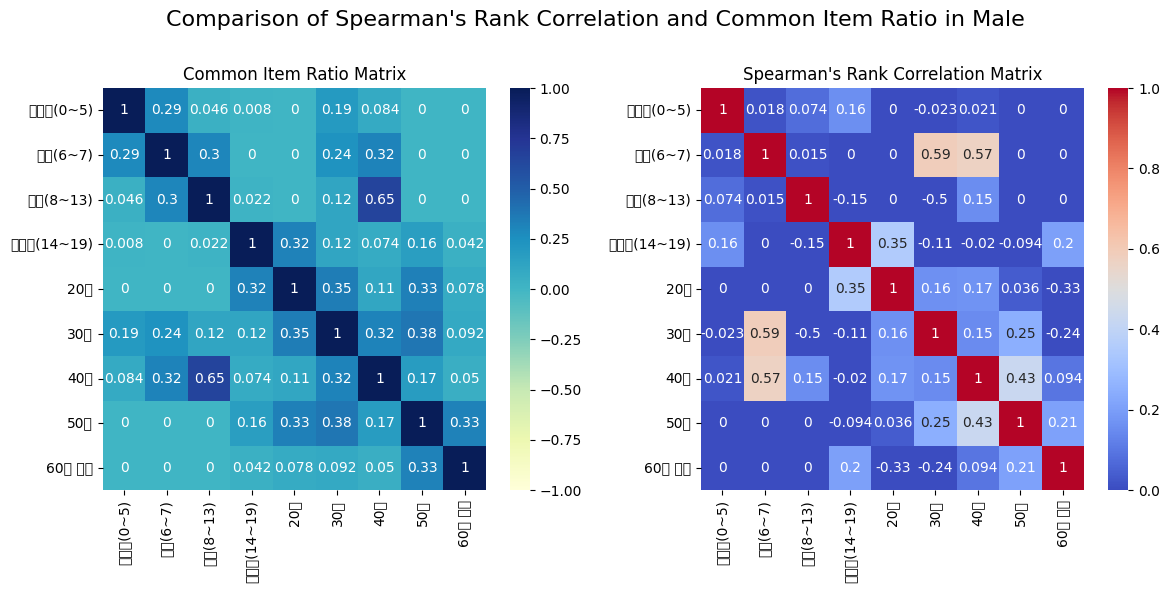

In [7]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore", category=UserWarning, message=".*Glyph.*")

correlation_matrix = pd.DataFrame(0, index=age, columns=age, dtype=float)
common_ratio_matrix = pd.DataFrame(0, index=age, columns=age, dtype=float)


for num in range(5):
    rank_data = []
    for i in age:
        rank_list1 = pd.read_csv(f'AGE_GENDER/{num+3}th/남성_{i}.csv')
        rank_list1 = rank_list1['ISBN_THIRTEEN_NO'][:100]
        rank_data.append(rank_list1)
    

    # 각 나이대별 순위 상관계수 계산
    for i, age1 in enumerate(age):
        for j, age2 in enumerate(age):
            # 두 나이대 순위 데이터의 공통된 ISBN_THIRTEEN_NO 찾기
            rank1 = rank_data[i]
            rank2 = rank_data[j]
        # 순위 리스트를 순위 딕셔너리로 변환 (책 이름 -> 순위)
            rank1_dict = {book: i+1 for i, book in enumerate(rank1)}
            rank2_dict = {book: i+1 for i, book in enumerate(rank2)}

            # 공통된 책들 찾기
            common_books = list(set(rank1_dict.keys()).intersection(set(rank2_dict.keys())))
            common_count = len(common_books)
            total_count = max(len(rank1_dict), len(rank2_dict))  # 전체 책 수는 두 리스트 중 더 큰 값


            # 공통된 책들의 순위를 리스트로 만듭니다
            rank1_common = [rank1_dict[book] for book in common_books]
            rank2_common = [rank2_dict[book] for book in common_books]

            # 공통된 책들에 대해서 순위 상관계수 (스피어만) 계산
            if len(rank1_common) > 1:  # 공통된 책이 두 개 이상일 때만 상관계수를 계산
                spearman_corr, _ = stats.spearmanr(rank1_common, rank2_common)
                common_ratio = common_count / total_count
                    
                # 상관계수와 공통 비율 행렬에 값 저장
                correlation_matrix.loc[age1, age2] += spearman_corr
                common_ratio_matrix.loc[age1, age2] += common_ratio
            else:
                # 공통된 책이 부족하면 None 또는 NaN으로 표시
                correlation_matrix.loc[age1, age2] +=0
                common_ratio_matrix.loc[age1, age2] +=0
                
correlation_matrix = correlation_matrix / 5
common_ratio_matrix = common_ratio_matrix / 5                  
                
# 상관계수 행렬을 히트맵으로 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 첫 번째 히트맵 (상관계수 행렬)


# 두 번째 히트맵 (공통 항목 비율 행렬)
sns.heatmap(common_ratio_matrix, annot=True, cmap="YlGnBu", vmin=-1, vmax=1, center=0, ax=axes[0])
axes[0].set_title("Common Item Ratio Matrix")


sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1, ax=axes[1])
axes[1].set_title("Spearman's Rank Correlation Matrix")

# 전체 제목 설정
plt.suptitle("Comparison of Spearman's Rank Correlation and Common Item Ratio in Male", fontsize=16)

# 레이아웃 조정
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # 상단 여백 조정

# 그래프 출력
plt.show()

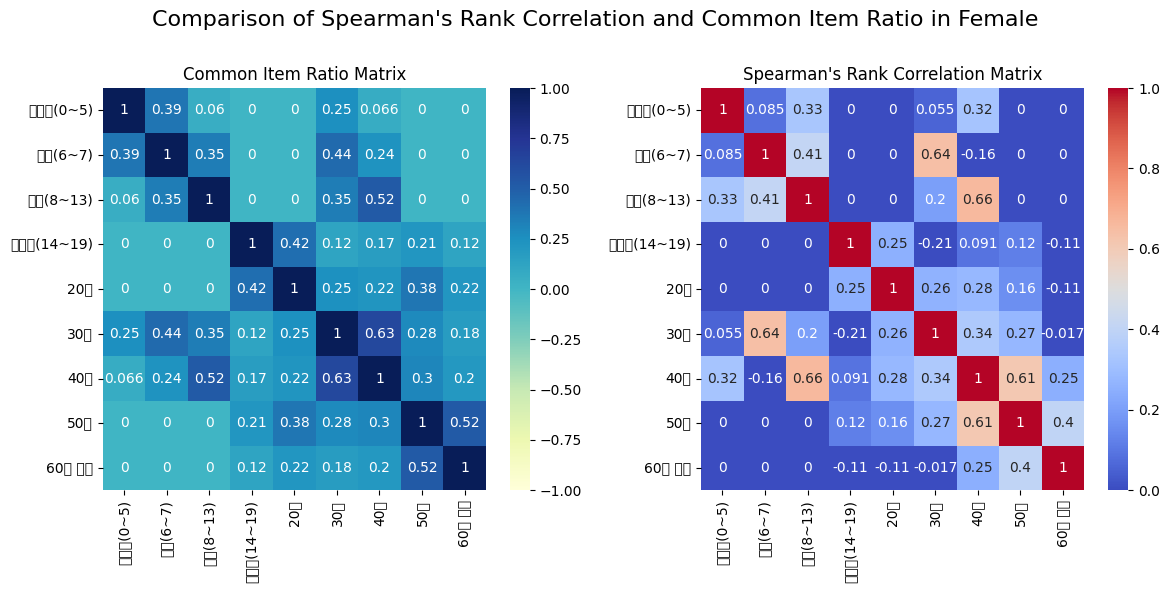

In [8]:

import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore", category=UserWarning, message=".*Glyph.*")

correlation_matrix = pd.DataFrame(0, index=age, columns=age, dtype=float)
common_ratio_matrix = pd.DataFrame(0, index=age, columns=age, dtype=float)


for num in range(5):
    rank_data = []
    for i in age:
        rank_list1 = pd.read_csv(f'AGE_GENDER/{num+3}th/여성_{i}.csv')
        rank_list1 = rank_list1['ISBN_THIRTEEN_NO'][:100]
        rank_data.append(rank_list1)
    

    # 각 나이대별 순위 상관계수 계산
    for i, age1 in enumerate(age):
        for j, age2 in enumerate(age):
            # 두 나이대 순위 데이터의 공통된 ISBN_THIRTEEN_NO 찾기
            rank1 = rank_data[i]
            rank2 = rank_data[j]
        # 순위 리스트를 순위 딕셔너리로 변환 (책 이름 -> 순위)
            rank1_dict = {book: i+1 for i, book in enumerate(rank1)}
            rank2_dict = {book: i+1 for i, book in enumerate(rank2)}

            # 공통된 책들 찾기
            common_books = list(set(rank1_dict.keys()).intersection(set(rank2_dict.keys())))
            common_count = len(common_books)
            total_count = max(len(rank1_dict), len(rank2_dict))  # 전체 책 수는 두 리스트 중 더 큰 값


            # 공통된 책들의 순위를 리스트로 만듭니다
            rank1_common = [rank1_dict[book] for book in common_books]
            rank2_common = [rank2_dict[book] for book in common_books]

            # 공통된 책들에 대해서 순위 상관계수 (스피어만) 계산
            if len(rank1_common) > 1:  # 공통된 책이 두 개 이상일 때만 상관계수를 계산
                spearman_corr, _ = stats.spearmanr(rank1_common, rank2_common)
                common_ratio = common_count / total_count
                    
                # 상관계수와 공통 비율 행렬에 값 저장
                correlation_matrix.loc[age1, age2] += spearman_corr
                common_ratio_matrix.loc[age1, age2] += common_ratio
            else:
                # 공통된 책이 부족하면 None 또는 NaN으로 표시
                correlation_matrix.loc[age1, age2] +=0
                common_ratio_matrix.loc[age1, age2] +=0
                
correlation_matrix = correlation_matrix / 5
common_ratio_matrix = common_ratio_matrix / 5                  
                
# 상관계수 행렬을 히트맵으로 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 첫 번째 히트맵 (상관계수 행렬)
sns.heatmap(common_ratio_matrix, annot=True, cmap="YlGnBu", vmin=-1, vmax=1, center=0, ax=axes[0])
axes[0].set_title("Common Item Ratio Matrix")

# 두 번째 히트맵 (공통 항목 비율 행렬)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1, ax=axes[1])
axes[1].set_title("Spearman's Rank Correlation Matrix")

# 전체 제목 설정
plt.suptitle("Comparison of Spearman's Rank Correlation and Common Item Ratio in Female", fontsize=16)

# 레이아웃 조정
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # 상단 여백 조정

# 그래프 출력
plt.show()

In [9]:

# 유효한 시점을 입력받는 함수
def get_day():
    while True:
        day = input("시점을 입력하시오. :\n '2022년 1월', '2021년 10월' 중 1개")
        if day in ['2022년 1월', '2021년 10월']:
            return day  # 유효한 값을 입력받으면 그 값을 반환
        print("잘못된 입력입니다. 다시 시도하십시오.")

# 유효한 성별을 입력받는 함수
def get_gender():
    while True:
        gender = input("성별을 입력하시오. :\n '남성', '여성' 중 1개")
        if gender in ['남성', '여성']:  # 유효한 성별 값이 들어온다면
            return gender  # 유효한 값을 반환
        print("잘못된 입력입니다. 다시 시도하십시오.")

# 유효한 연령을 입력받는 함수
def get_age():
    while True:
        age = input("연령을 입력하시오. :\n '영유아(0~5)',  '유아(6~7)', '초등(8~13)', '청소년(14~19)','20대', '30대' ,'40대', '50대', '60대 이상' 중 1개")
        if age in ['영유아(0~5)',  '유아(6~7)', '초등(8~13)', '청소년(14~19)','20대', '30대' ,'40대', '50대', '60대 이상']:  # 연령을 숫자로 입력받고 0~120 사이 값인지 확인
            return age  # 유효한 연령을 반환
        print("잘못된 입력입니다. 다시 시도하십시오.")

# 함수 호출하여 값 받기
day = get_day()
gender = get_gender()
age = get_age()


if day == '2022년 1월':
    start = 1

elif day =='2021년 10월':
    start = 0    

if age not in ['30대' ,'40대']:
    rank_data = []
    for num in range(4):

        rank_list1 = pd.read_csv(f'AGE_GENDER/{num+start+3}th/{gender}_{age}.csv')
        rank_list2 = rank_list1['ISBN_THIRTEEN_NO'][:10]
        rank_data.append(rank_list2)
        
    common_elements = set(rank_data[0]) & set(rank_data[1]) & set(rank_data[2])& set(rank_data[3]) 

    # 결과 출력
    print("당신을 위한 스테디 셀러 책 추천")
    print("\n")
    num = 0
    for i in common_elements:
        num +=1
        if num >=5:
            continue    
        print(f"제목 : {rank_list1[rank_list1['ISBN_THIRTEEN_NO']== i]['BOOK_TITLE_NM'].item()}")
        print(f"작가 : {rank_list1[rank_list1['ISBN_THIRTEEN_NO']== i]['AUTHR_NM'].item()}")
        print(f"출판사 : {rank_list1[rank_list1['ISBN_THIRTEEN_NO']== i]['PUBLISHER_NM'].item()}")
        print(f"책 설명 : {rank_list1[rank_list1['ISBN_THIRTEEN_NO']== i]['BOOK_INTRCN_CN'].item()}")
        print('\n')


    # 첫 3개의 집합에 공통된 원소들을 구함
    common_in_first_three =  set(rank_data[0]) & set(rank_data[1]) & set(rank_data[2])

    # 마지막 집합(set4)에서 첫 3개의 집합에 있는 공통 원소를 제외한 원소 찾기
    unique_in_set4 = set(rank_data[3])  - common_in_first_three

    print("이번 분기 당신을 위해 갑자기 등장한 라이징스타")
    print("\n")
    num = 0
    for i in unique_in_set4:
        num +=1
        if num >=5:
            continue
        print(f"제목 : {rank_list1[rank_list1['ISBN_THIRTEEN_NO']== i]['BOOK_TITLE_NM'].item()}")
        print(f"작가 : {rank_list1[rank_list1['ISBN_THIRTEEN_NO']== i]['AUTHR_NM'].item()}")
        print(f"출판사 : {rank_list1[rank_list1['ISBN_THIRTEEN_NO']== i]['PUBLISHER_NM'].item()}")
        print(f"책 설명 : {rank_list1[rank_list1['ISBN_THIRTEEN_NO']== i]['BOOK_INTRCN_CN'].item()}")
        print('\n')
else:
    rank_data = []
    
    
    for num in range(4):

        rank_list1 = pd.read_csv(f'AGE_GENDER/{num+start+3}th/{gender}_{age}.csv')
        child_list1 = set(pd.read_csv(f'AGE_GENDER/{num+start+3}th/남성_유아(6~7).csv')['ISBN_THIRTEEN_NO'].to_list())
        child_list2 = set(pd.read_csv(f'AGE_GENDER/{num+start+3}th/남성_초등(8~13).csv')['ISBN_THIRTEEN_NO'].to_list())
        child_list3 = set(pd.read_csv(f'AGE_GENDER/{num+start+3}th/여성_유아(6~7).csv')['ISBN_THIRTEEN_NO'].to_list())
        child_list4 = set(pd.read_csv(f'AGE_GENDER/{num+start+3}th/여성_초등(8~13).csv')['ISBN_THIRTEEN_NO'].to_list())

        rank_list2 = set(rank_list1['ISBN_THIRTEEN_NO'][:25].to_list())
        rank_data.append(rank_list2 - child_list1 - child_list2 - child_list3 - child_list4)
        
    common_elements = rank_data[0] & rank_data[1] & rank_data[2]& rank_data[3]

    # 결과 출력
    print("당신을 위한 스테디 셀러 책 추천")
    print("\n")
    num = 0
    for i in common_elements:
        num +=1
        if num >=5:
            continue    
        print(f"제목 : {rank_list1[rank_list1['ISBN_THIRTEEN_NO']== i]['BOOK_TITLE_NM'].item()}")
        print(f"작가 : {rank_list1[rank_list1['ISBN_THIRTEEN_NO']== i]['AUTHR_NM'].item()}")
        print(f"출판사 : {rank_list1[rank_list1['ISBN_THIRTEEN_NO']== i]['PUBLISHER_NM'].item()}")
        print(f"책 설명 : {rank_list1[rank_list1['ISBN_THIRTEEN_NO']== i]['BOOK_INTRCN_CN'].item()}")
        print('\n')


    # 첫 3개의 집합에 공통된 원소들을 구함
    common_in_first_three =  rank_data[0] & rank_data[1] & rank_data[2]

    # 마지막 집합(set4)에서 첫 3개의 집합에 있는 공통 원소를 제외한 원소 찾기
    unique_in_set4 = rank_data[3]  - common_in_first_three

    print("이번 분기 당신을 위해 갑자기 등장한 라이징스타")
    print("\n")
    num = 0
    for i in unique_in_set4:
        num +=1
        if num >=5:
            continue
        print(f"제목 : {rank_list1[rank_list1['ISBN_THIRTEEN_NO']== i]['BOOK_TITLE_NM'].item()}")
        print(f"작가 : {rank_list1[rank_list1['ISBN_THIRTEEN_NO']== i]['AUTHR_NM'].item()}")
        print(f"출판사 : {rank_list1[rank_list1['ISBN_THIRTEEN_NO']== i]['PUBLISHER_NM'].item()}")
        print(f"책 설명 : {rank_list1[rank_list1['ISBN_THIRTEEN_NO']== i]['BOOK_INTRCN_CN'].item()}")
        print('\n')
        



잘못된 입력입니다. 다시 시도하십시오.
잘못된 입력입니다. 다시 시도하십시오.
당신을 위한 스테디 셀러 책 추천


제목 : 우리가 빛의 속도로 갈 수 없다면 :김초엽 소설 
작가 : 지은이: 김초엽
출판사 : 허블
책 설명 : 2017년 '관내분실'과 '우리가 빛의 속도로 갈 수 없다면'으로 제2회 한국과학문학상 중단편 대상과 가작을 수상하며 작품 활동을 시작한 김초엽 작품집. '순례자들은 왜 돌아오지 않는가', '스펙트럼', '공생가설', '우리가 빛의 속도로 갈 수 없다면', '감정의 물성', '관내분실', '나의 우주 영웅에 관하여'가 수록되었다.


제목 : 지구에서 한아뿐 :정세랑 장편소설 
작가 : 지은이: 정세랑
출판사 : 난다
책 설명 : 창비장편소설상, 한국일보문학상 수상 작가 정세랑의 두번째 장편소설. 우주 가장자리에서 일어나 모두가 기억하게 된, 외계인 경민과 지구인 한아의 아주 희귀한 종류의 사랑 이야기이다.


제목 : 달러구트 꿈 백화점.이미예 장편소설 
작가 : 지은이: 이미예
출판사 : 팩토리나인
책 설명 : 이미예 장편소설. 잠들어야만 입장할 수 있는 독특한 마을. 그곳에 들어온 잠든 손님들에게 가장 인기 있는 곳은, 온갖 꿈을 한데 모아 판매하는 '달러구트의 꿈 백화점'이다. 긴 잠을 자는 사람들은 물론이고, 짧은 낮잠을 자는 사람들과 동물들로 매일매일 대성황을 이룬다.


제목 : 시선으로부터,
작가 : 정세랑 (지은이)
출판사 : 문학동네
책 설명 : 데뷔 10년, 장르를 넘나들며 다양한 방식으로 이야기를 펼쳐내면서도 우리를 단 한 번도 실망시킨 적이 없는 정세랑 작가가 돌아왔다. 구상부터 완성까지 5년이 걸린 대작으로, 한국일보문학상을 수상한 &lt;피프티 피플&gt; 이후 4년 만에 내놓는 신작 장편소설이다.


이번 분기 당신을 위해 갑자기 등장한 라이징스타


제목 : 지구 끝의 온실 :김초엽 장편소설 
작가 : 지은이: 김초엽
출판사 : Giant Books(자이언트북스)
책 설명 : 첫 작품집 『우리가 빛의 속도

In [10]:
from transformers import BertTokenizer, BertModel
import torch
# koBERT 모델과 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained('monologg/kobert')
model = BertModel.from_pretrained('monologg/kobert')

def encode_text_batch(texts):
    # 텍스트들을 한 번에 배치로 처리
    inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True, max_length=128)
    
    # BERT 모델을 통해 텍스트 벡터화 (출력은 hidden states)
    with torch.no_grad():
        outputs = model(**inputs)
    
    # [CLS] 토큰의 마지막 히든 상태를 사용 (text embedding)
    embeddings = outputs.last_hidden_state[:, 0, :].numpy()  # [CLS] 토큰의 임베딩
    return embeddings

/opt/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'KoBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


In [ ]:
books = pd.read_csv('books2.csv')

In [ ]:
import tqdm

book_embedding = []
for i in tqdm.tqdm(books['BOOK_INTRCN_CN'].fillna('').to_list(), desc="Processing books"):
    if i =='':
        book_embedding.append('')
    
    elif i !='':
        # 여러 개의 책 설명을 배치로 벡터화
        book_embeddings = encode_text_batch(i)
        book_embedding.append(book_embeddings)

books['emb'] = book_embedding



Processing books: 100%|██████████| 102819/102819 [40:58<00:00, 41.83it/s] 
